# $\color{red}{\text{Farbod Siahkali - 810198510}}$

# $\color{green}{\text{Answers to Questions}}$

1) The data was split into train and test using the train_test_split function from scikit-learn with a test size of 20% and a random state of 42. This splitting proportion is a common choice in machine learning as it balances the need for having enough data for training the model and having enough data for testing and evaluating the model's performance.

2) Each pixel in the dataset is in the range of 0 to 255.

3) We convert all images into 20x20 pixels to standardize the input size for the model. This is necessary because the images in the dataset have different sizes, and if we use them as they are, the model may not be able to learn effectively from the input images.

6) If we don't scale the pixel values between 0 and 1, the model may give more weight to the pixel values that have higher ranges, which may result in poor performance. Scaling the pixel values between 0 and 1 ensures that each pixel value contributes equally to the model's learning process.

7) In Bayesian statistics, evidence refers to the probability of observing the data, given a hypothesis. Likelihood refers to the probability of observing the data, given the parameters of the model. Prior refers to the probability of the parameters of the model before observing the data. Posterior refers to the probability of the parameters of the model after observing the data. In this problem, evidence is the probability of observing the image data, likelihood is the probability of observing the pixel values given a class, prior is the probability of a class before observing the pixel values, and posterior is the probability of a class after observing the pixel values.

8) In Gaussian Naive Bayes, if the variance of a class becomes zero, it means that all the pixel values for that class are the same. This results in the division of zero in the Gaussian PDF equation, which causes the model to fail. This problem is also known as the "zero-frequency problem".

9) Smoothing is a technique used to address the zero-frequency problem in Gaussian Naive Bayes. The most common smoothing technique is to add a small value to the variance of each feature for each class. This value is called the smoothing parameter or alpha. By adding this small value, the variance of each feature is never zero, and the model can still learn from the data.

10) Evaluating just by precision and recall is not enough to evaluate the model because they only measure the model's performance on one aspect of the classification problem. Precision measures the fraction of true positive predictions over all positive predictions, and recall measures the fraction of true positive predictions over all true positives. However, in some cases, we may care about both precision and recall equally, or we may have imbalanced classes where one class has significantly fewer samples than others. In such cases, we need more comprehensive evaluation metrics.

11) F1 score is a weighted average of precision and recall that ranges between 0 and 1, where 1 represents the best possible performance. It balances precision and recall and is useful when both are important. F1 score is computed as the harmonic mean of precision and recall, which gives more weight to lower values. The harmonic mean is used instead of the arithmetic mean because it punishes extreme values more severely, which is desirable in cases where the data is imbalanced. Normal averaging gives equal weight to all values, which may not be appropriate when the classes are imbalanced.

12) In multi-class classification problems where the number of classes is greater than two, precision, recall and F1 score can be calculated using three different averaging modes: macro, micro, and weighted averaging.

1. Macro-averaging: In this method, we calculate the average precision, recall, and F1 score across all classes without taking into account the number of samples in each class. It treats all classes equally, regardless of their frequency in the dataset. It is particularly useful when we want to ensure that the model is performing well for all classes, not just the majority ones.

2. Micro-averaging: In this method, we calculate the precision, recall, and F1 score for all classes collectively, by treating all samples equally. It is particularly useful when we want to measure the overall performance of the model, regardless of the class distribution.

3. Weighted-averaging: In this method, we calculate the average precision, recall, and F1 score for all classes, weighted by the number of samples in each class. This method is useful when we want to ensure that the model is performing well for both majority and minority classes, and it takes into account the class distribution in the dataset. The more samples a class has, the more it contributes to the final score.

In summary, macro-averaging gives equal importance to each class, micro-averaging treats all samples equally, and weighted-averaging takes into account the class distribution in the dataset. The choice of averaging mode depends on the specific problem and the goals of the analysis.

# $\color{green}{\text{Implementation}}$

This cell imports the necessary libraries for the project, which are pickle, numpy, matplotlib, and scikit-image. The libraries' functions will be used later to load the dataset, preprocess it, and evaluate the model's performance.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

This cell loads the dataset and its corresponding labels from 'data.pkl' and 'label.pkl' files, respectively. The dataset contains 6000 handwritten digit images with diffrenet pixels shapes, and the labels range from 0 to 9.

In [2]:
pkl_data = open('/content/data.pkl', 'rb')
pkl_label = open('/content/label.pkl', 'rb')
data = pickle.load(pkl_data)
label = pickle.load(pkl_label)

This cell splits the dataset into training and testing sets using the train_test_split function from the scikit-learn library. The splitting ratio is set to 0.2, which means 20% of the data will be used for testing, and the rest will be used for training. The splitting is done randomly, but the random seed is set to 42 to ensure the reproducibility of the results.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

This cell shows a random image from the training set using the Matplotlib library's imshow function. The color map is set to 'gray,' and the color bar is displayed to show the pixel values' range.

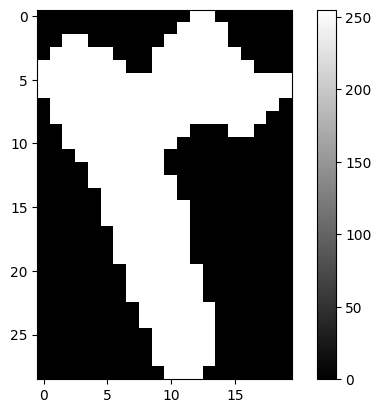

In [4]:
rand_idx = np.random.randint(len(X_train))
plt.imshow(X_train[rand_idx], cmap='gray')
plt.colorbar()

This cell resizes all the images in the training and testing sets to 20x20 pixels using the resize function from the skimage.transform library. The resizing is done to reduce the number of features and make the classification task computationally feasible.

In [5]:
new_size = (20, 20)
X_train_resized = np.array([resize(img, new_size) for img in X_train])
X_test_resized = np.array([resize(img, new_size) for img in X_test])

This cell displays a random image from each of the 10 classes in the training set. The images are displayed using matplotlib's imshow function with a gray colormap.

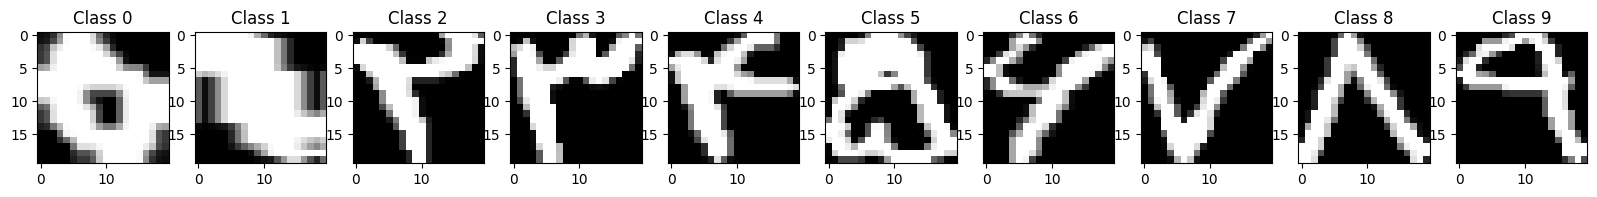

In [6]:
class_idx = np.unique(y_train)
fig, axs = plt.subplots(1, len(class_idx), figsize=(20, 5))
for i, idx in enumerate(class_idx):
    img = X_train_resized[y_train==idx][0]
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(f"Class {idx}")

plt.show()

Here, the number of images in each class for both the training and testing sets are counted and displayed as a bar chart using matplotlib.

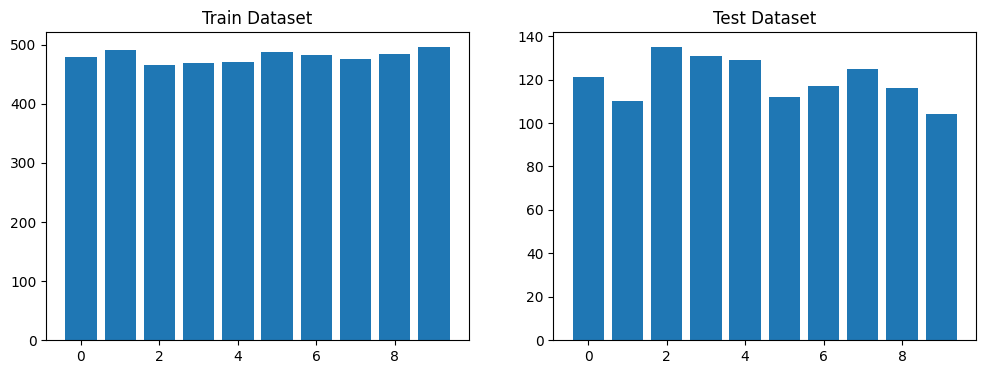

In [7]:
train_counts = np.unique(y_train, return_counts=True)[1]
test_counts = np.unique(y_test, return_counts=True)[1]
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].bar(class_idx, train_counts)
axs[0].set_title("Train Dataset")
axs[1].bar(class_idx, test_counts)
axs[1].set_title("Test Dataset")
plt.show()

This cell applies MinMax scaling to the resized training and testing data using scikit-learn's MinMaxScaler function. This scales each pixel value to be between 0 and 1, which is necessary for some machine learning algorithms.

In [8]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resized.reshape(len(X_train_resized), -1))
X_test_scaled = scaler.transform(X_test_resized.reshape(len(X_test_resized), -1))

# $\color{green}{\text{Gaussian Naive Bayes}}$

<div class="markdown prose w-full break-words dark:prose-invert light">
    <p>This is an implementation of Gaussian Naive Bayes algorithm for classification. Naive Bayes is a probabilistic
        algorithm that predicts the class of a sample based on the Bayes theorem, which uses the prior probability of
        the class and the likelihood of the feature values given the class to compute the posterior probability of the
        class given the feature values.</p>
    <p>In the Gaussian Naive Bayes algorithm, the likelihood of the feature values is modeled as a Gaussian distribution
        with a mean and variance. The algorithm assumes that the features are independent given the class, hence the
        "Naive" part of the name. This simplifies the computation of the likelihood as the joint probability of the
        features can be factorized into the product of the probabilities of the individual features.</p>
    <p>The <code>fit</code> method of the <code>GaussianNaiveBayes</code> class takes the input data <code>X</code> and
        the corresponding target labels <code>y</code> and computes the mean and variance of the features for each
        class, as well as the prior probability of each class. The variance is adjusted with a small regularization
        parameter <code>alpha</code> to prevent it from being zero, which would cause problems during the computation of
        the Gaussian probability density function.</p>
    <p>The <code>predict</code> method takes a new set of feature values <code>X</code> and uses the mean and variance
        of the features for each class to compute the likelihood of the feature values given the class. It then combines
        this likelihood with the prior probability of the class to compute the posterior probability of the class given
        the feature values, using the logarithm to avoid numerical underflow. Finally, it returns the class with the
        highest posterior probability.</p>
    <p>The <code>gaussian_pdf</code> method computes the Gaussian probability density function for a given set of
        feature values <code>X</code>, mean <code>mean</code>, and variance <code>var</code>. It uses the formula for
        the univariate Gaussian distribution to compute the probability density for each feature, and then multiplies
        them together to get the joint probability density.</p>
</div>

In [9]:
class GaussianNaiveBayes:
    def fit(self, X, y, alpha=1e-3):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}
        for c in self.classes:
            X_c = X[y==c]
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0) + alpha
            self.priors[c] = X_c.shape[0] / X.shape[0]
        
    def predict(self, X):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.priors[c])
            likelihood = np.sum(np.log(self.gaussian_pdf(X, self.mean[c], self.var[c])), axis=1)
            posterior = prior + likelihood
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors, axis=0)]
        
    def gaussian_pdf(self, X, mean, var):
        return 1 / np.sqrt(2 * np.pi * var) * np.exp(-0.5 * (X-mean)**2 / var)


Here, an instance of the GaussianNaiveBayes class is created and trained on the scaled training data. The predict method is then used to predict the class for each image in the testing set. The classification_report function from scikit-learn is used to compute the evaluation metrics, including precision, recall, and F1-score, for each class. The target_names parameter is set to the class labels to display the results for each class.

In [10]:
model = GaussianNaiveBayes()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       121
           1       0.87      0.80      0.83       110
           2       0.77      0.61      0.68       135
           3       0.71      0.88      0.79       131
           4       0.87      0.84      0.86       129
           5       0.93      0.96      0.94       112
           6       0.94      0.77      0.85       117
           7       0.94      0.94      0.94       125
           8       0.99      0.98      0.99       116
           9       0.77      0.99      0.87       104

    accuracy                           0.87      1200
   macro avg       0.87      0.87      0.87      1200
weighted avg       0.87      0.87      0.86      1200



<div class="markdown prose w-full break-words dark:prose-invert light">
    <p>This code defines a custom function <code>my_classification_report</code> that takes in two parameters
        <code>y_true</code> and <code>y_pred</code>. The function calculates a confusion matrix <code>cm</code> using
        <code>np.zeros()</code> and a for loop that goes through each true and predicted class and increments the
        corresponding cell in the matrix.</p>
    <p>Next, the function calculates precision, recall, and f1-score for each class using another for loop that goes
        through each class. The function calculates true positives (<code>tp</code>), false positives (<code>fp</code>),
        false negatives (<code>fn</code>), and true negatives (<code>tn</code>) based on the confusion matrix. It then
        calculates precision, recall, and f1-score using the following formulas:</p>
    <ul>
        <li>Precision = TP / (TP + FP)</li>
        <li>Recall = TP / (TP + FN)</li>
        <li>F1-score = 2 * (Precision * Recall) / (Precision + Recall)</li>
    </ul>
    <p>The function then calculates the support for each class, which is the number of samples in each class. Using the
        precision, recall, f1-score, and support values, the function calculates macro-averaged and weighted-averaged
        precision, recall, and f1-score. Macro-averaged values are calculated by taking the mean of all class-specific
        values. Weighted-averaged values are calculated by weighting the class-specific values by the support and then
        taking the mean.</p>
    <p>Finally, the function returns precision, recall, and f1-score as a list of arrays</p>
</div>

In [11]:
def my_classification_report(y_true, y_pred):
    # import necessary libraries

    # calculate the confusion matrix
    cm = np.zeros((10, 10))
    for i in range(len(y_true)):
        cm[y_true[i], y_pred[i]] += 1

    # calculate precision, recall, and f1-score for each class
    precision = []
    recall = []
    f1_score = []
    for i in range(10):
        tp = cm[i,i]
        fp = np.sum(cm[:,i]) - tp
        fn = np.sum(cm[i,:]) - tp
        tn = np.sum(cm) - tp - fp - fn
        prec = tp / (tp + fp) if tp + fp > 0 else 0
        reca = tp / (tp + fn) if tp + fn > 0 else 0
        f1 = 2 * prec * reca / (prec + reca) if prec + reca > 0 else 0
        precision.append(round(prec, 2))
        recall.append(round(reca, 2))
        f1_score.append(round(f1, 2))

    # calculate support for each class
    support = np.sum(cm, axis=1)

    # calculate macro-averaged precision, recall, and f1-score
    macro_precision = np.mean(precision)
    macro_recall = np.mean(recall)
    macro_f1_score = np.mean(f1_score)

    # calculate weighted-averaged precision, recall, and f1-score
    weighted_precision = np.sum(precision * support) / np.sum(support)
    weighted_recall = np.sum(recall * support) / np.sum(support)
    weighted_f1_score = np.sum(f1_score * support) / np.sum(support)

    return precision, recall, f1_score

res = my_classification_report(y_test, y_pred)
print('Precision:', res[0])
print('Recall:', res[1])
print('F1:', res[2])

Precision: [0.93, 0.87, 0.77, 0.71, 0.87, 0.93, 0.94, 0.94, 0.99, 0.77]
Recall: [0.93, 0.8, 0.61, 0.88, 0.84, 0.96, 0.77, 0.94, 0.98, 0.99]
F1: [0.93, 0.83, 0.68, 0.79, 0.86, 0.94, 0.85, 0.94, 0.99, 0.87]


# $\color{green}{\text{Bernoulli Naive Bayes}}$

<div class="min-h-[20px] flex flex-col items-start gap-4 whitespace-pre-wrap break-words">
    <div class="markdown prose w-full break-words dark:prose-invert light">
        <p>This algorithm is an implementation of Bernoulli Naive Bayes classifier. It is used to classify data into
            multiple classes based on the probability of the input features given each class. The algorithm has two main
            methods: <code>fit</code> and <code>predict</code>.</p>
        <p>The <code>fit</code> method trains the classifier on the training data by calculating the class probabilities
            and feature probabilities. It first calculates the unique classes in the target variable and the number of
            features in the input data. It then initializes the class and feature probabilities to zeros.</p>
        <p>For each class, the method calculates the prior probability of that class by dividing the number of samples
            belonging to that class by the total number of samples. It also calculates the feature probabilities for
            that class by dividing the number of samples in which the feature appears by the total number of samples in
            that class, adding the smoothing parameter alpha to avoid zero probabilities.</p>
        <p>The <code>predict</code> method uses the trained probabilities to predict the class of new samples. For each
            sample, it calculates the likelihood of the features given each class by multiplying the feature
            probabilities for each feature that appears in the sample and the complement of the feature probabilities
            for each feature that does not appear in the sample. It then calculates the posterior probability for each
            class by multiplying the prior probability and the likelihood. Finally, it predicts the class with the
            highest posterior probability.</p>
        <p>Overall, this algorithm is a simple and efficient way to classify data with binary features into multiple
            classes.</p>
    </div>
</div>

In [12]:
class BernoulliNB():
    
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        
    def fit(self, X_train, y_train):
        self.classes = np.unique(y_train)
        self.n_classes = len(self.classes)
        self.n_features = X_train.shape[1]
        
        self.class_prob = np.zeros(self.n_classes)
        self.feature_prob = np.zeros((self.n_features, self.n_classes))
        
        for i, c in enumerate(self.classes):
            X_c = X_train[y_train == c]
            self.class_prob[i] = X_c.shape[0] / X_train.shape[0]
            self.feature_prob[:, i] = (np.sum(X_c, axis=0) + self.alpha) / (X_c.shape[0] + 2*self.alpha)
        
    def predict(self, X_test):
        y_pred = np.zeros(X_test.shape[0], dtype=np.int8)
        
        for i, x in enumerate(X_test):
            posteriors = np.zeros(self.n_classes)
            
            for j, c in enumerate(self.classes):
                likelihood = np.prod(self.feature_prob[x == 1, j]) * np.prod(1 - self.feature_prob[x == 0, j])
                posteriors[j] = likelihood * self.class_prob[j]
                
            y_pred[i] = self.classes[np.argmax(posteriors)]
        
        return y_pred



To convert pixel values to binary using a threshold, the NumPy where function can be used. In this code snippet, a threshold of 0.5 is used to convert the pixel values in the training and test sets to binary values.

The X_train_scaled and X_test_scaled arrays contain the pixel values of the images in the training and test sets, which have been scaled to values between 0 and 1.

The where function checks whether each element of the input array is greater than the threshold value. If an element is greater than the threshold, it is replaced with 1, otherwise it is replaced with 0. The resulting binary arrays are stored in X_train_binary and X_test_binary, respectively.

Binary pixel values are often used in machine learning tasks, particularly for image classification tasks, where the presence or absence of certain features in an image can be represented by binary values.

In [13]:
# Convert pixel values to binary using a threshold
threshold = 0.5
X_train_binary = np.where(X_train_scaled > threshold, 1, 0)
X_test_binary = np.where(X_test_scaled > threshold, 1, 0)

This code snippet trains and evaluates a Naive Bayes model using the BernoulliNB implementation from scikit-learn library. Here is the breakdown of what the code does:

* model = BernoulliNB(alpha=0.5): Instantiate a Bernoulli Naive Bayes model with Laplace smoothing parameter alpha set to 0.5.
* model.fit(X_train_binary, y_train): Train the model on the training data X_train_binary and the corresponding labels y_train.
* y_pred = model.predict(X_test_binary): Use the trained model to predict the labels for the test data X_test_binary.

In [14]:
# Train and evaluate the model
model = BernoulliNB(alpha=0.5)
model.fit(X_train_binary, y_train)
y_pred = model.predict(X_test_binary)

target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       121
           1       0.83      0.84      0.83       110
           2       0.72      0.71      0.71       135
           3       0.82      0.76      0.79       131
           4       0.89      0.90      0.90       129
           5       0.94      0.97      0.96       112
           6       0.91      0.77      0.83       117
           7       0.94      0.91      0.93       125
           8       0.99      0.98      0.99       116
           9       0.80      0.99      0.88       104

    accuracy                           0.87      1200
   macro avg       0.88      0.88      0.87      1200
weighted avg       0.87      0.87      0.87      1200



Getting results from the implemented function.

In [15]:
res = my_classification_report(y_test, y_pred)
print('Precision:', res[0])
print('Recall:', res[1])
print('F1:', res[2])

Precision: [0.92, 0.83, 0.72, 0.82, 0.89, 0.94, 0.91, 0.94, 0.99, 0.8]
Recall: [0.93, 0.84, 0.71, 0.76, 0.9, 0.97, 0.77, 0.91, 0.98, 0.99]
F1: [0.93, 0.83, 0.71, 0.79, 0.9, 0.96, 0.83, 0.93, 0.99, 0.88]


14) The classification report provides a summary of the performance of the model on the test dataset. The report consists of several metrics such as precision, recall, and f1-score for each class, as well as the overall accuracy, macro average, and weighted average.

In this particular case, we can see that the model has achieved an accuracy of 0.87 or 87%, which means that it correctly classified 87% of the samples in the test dataset. However, looking at the precision, recall, and f1-score for each class, we can see that the model's performance varies across different classes.

For example, the model has a high precision, recall, and f1-score for class 8, indicating that it is good at correctly identifying this class. On the other hand, class 2 has a relatively lower precision, recall, and f1-score, indicating that the model struggles to correctly classify this class.

The macro average and weighted average of the precision, recall, and f1-score are both 0.88, which indicates that the model's overall performance is relatively balanced across all classes.

Overall, the classification report provides a useful summary of the model's performance, and it can help identify areas where the model is performing well and areas where it needs improvement.

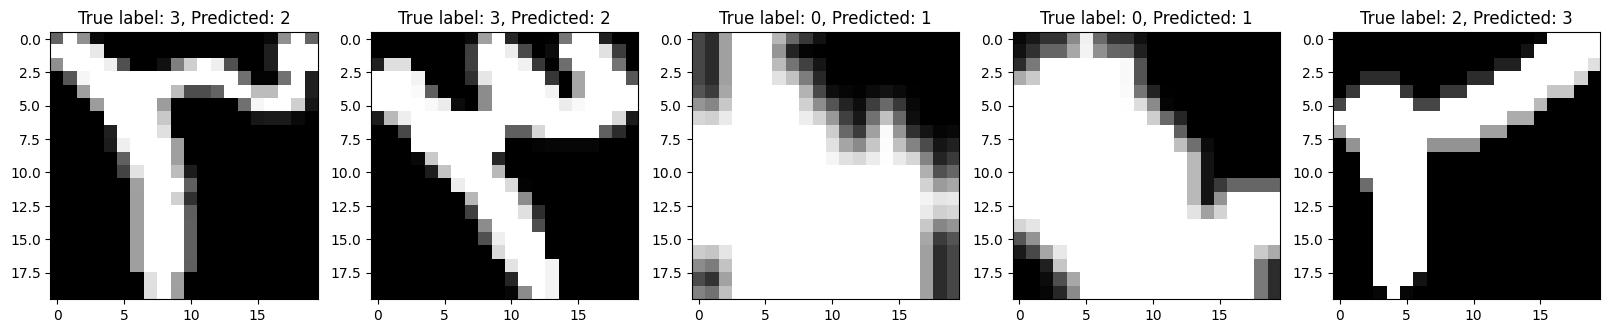

In [29]:
import random

# Find the indices of the misclassified images
misclassified_idx = np.where(y_pred != y_test)[0]
# Display 5 misclassified images along with their predictions
num_images = 5
lst = random.choices(misclassified_idx, k=num_images)

fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, idx in enumerate(lst):
    axes[i].imshow(X_test_resized[idx], cmap='gray')
    axes[i].set_title(f"True label: {y_test[idx]}, Predicted: {y_pred[idx]}")
plt.show()
